<hr>
Este material ha sido construido en conjunto con material suministrado por los profesores Pedro Atencio (Instituto Tecnológico Metropolitano), Carlos Mera (Universidad de Medellin), Albeiro Espinosa y Diego Patiño (Universidad Nacional de Colombia, Sede Medellín); a ellos les damos crédito.
<hr>

#  <center> VISIÓN ARTIFICIAL </center>
## Agenda del día


### Unidad 4 - Funciones de transformación básica

### 4. Funciones de transformación básica
<ul>
<li>Operaciones binarias</li>
<li>Transformaciones lógicas</li>
</ul>

<img src="res/pipeline.png"/>

# 1. Transformaciones u operaciones aritméticas binarias (con dos imágenes)

Las operaciones aritméticas entre imágenes son operaciones se llevan a cabo entre pares de pixeles correspondientes. Las cuatro operaciones básicas son:

C(x, y) = A(x,y) + B(x,y)

C(x, y) = A (x,y) - B(x,y)

C(x, y) = A (x,y) * B(x,y)

C(x, y) = A (x,y) / B(x,y)


## Suma 

Podemos realizar una suma simple de dos imágenes (sin que una de ellas tenga que ser una máscara), aunque resultando en saturación...

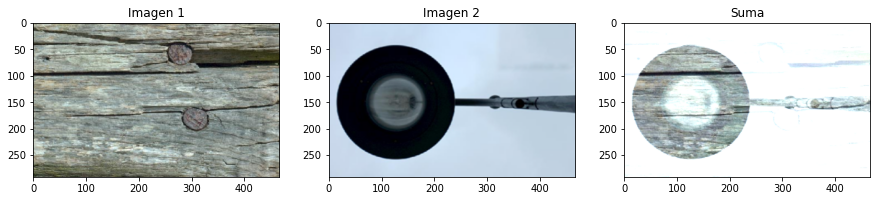

In [18]:
#Importar las librerias necesarias y no olvidar el matplotlib inline para plotear las imagenes
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Leer las imágenes, hacerlas del mismo tamaño para poderlas sumar
img1 = cv2.cvtColor(cv2.imread('res/m3/example_4.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/m3/example_3.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

#Operación suma de las dos imágenes
res = cv2.add(img1,img2)

#Crear una figura 1x3 para plotear las imágenes de entrada y la obtenida al sumarlas
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Suma");


La operación suma tiene más sentido como una combinación ponderada de dos imágenes...

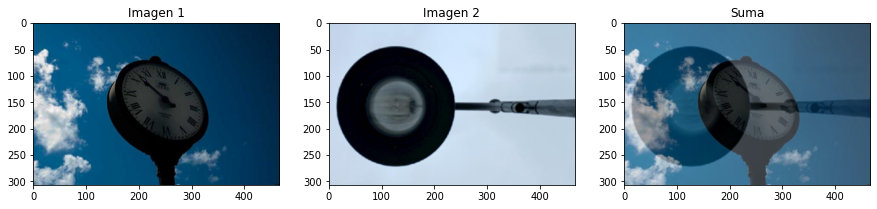

In [19]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Leer las imágenes, hacerlas del mismo tamaño para poderlas sumar
img1 = cv2.cvtColor(cv2.imread('res/m3/example_2.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/m3/example_3.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

#Indicamos el parámetro a que indica la importancia de cada imagen
a = 0.7

#Mediante la T.Lineal, si a=1, tenemos la imagen 1 únicamente. Si a=0, obtenemos solo img2.
# Si 0<a<1 tendremos combinaciones ponderadas de las imágenes entrada
res = cv2.add(img1*a,img2*(1-a)).astype(np.uint8)

#Crear una figura 1x3 para mostrar las imágenes de entrada y la combinación ponderada
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Suma");


## Aplicaciones de la suma

El operador suma puede ser utilizado para sobreponerle a un objeto los bordes obtenidos por algún método de detección de bordes.



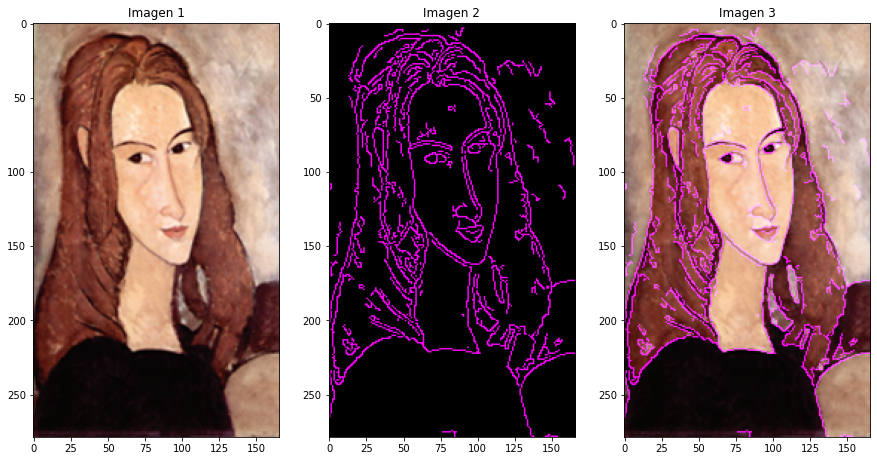

In [20]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Leer la imagen de entrada
img1 =cv2.cvtColor(cv2.imread('res/aritm/portrait.png'), cv2.COLOR_BGR2RGB)

#Utilizamos la función cv2.Canny, que corresponde a un algoritmo de detección de bordes
edges = cv2.Canny(img1,100,200)
#Resaltar los bordes de blanco si sus pixeles son menores que un valor umbral
edges[edges<128] = 0   
#Convertir la imagen edges a RGB
edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

edges[:,:,1]=0               #para obtener el color magenta (255,0,255)

#Crear una figura 1x3 para mostrar la imagen de entrada, la imagen obtenida con edges y la superposición
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(edges,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(cv2.add(img1,edges),cmap='gray')
plt.title("Imagen 3");



También podemos utilizar la suma para promediar imágenes del mismo fenómeno que tengan ruido aleatorio y mejorar la calidad...

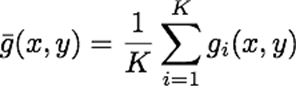

<img src="res/aritm/promedio.png">

Ejemplo interactivo: https://www.olympus-lifescience.com/en/microscope-resource/primer/java/digitalimaging/processing/imageaveraging/

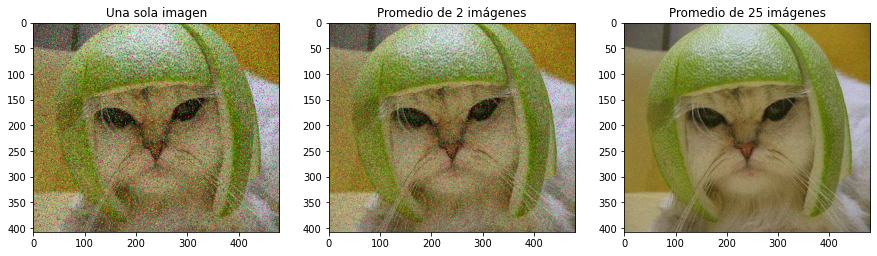

In [21]:
import numpy as np
import os
import cv2

#Definir la función ruido, cuyo parámetro es una imagen de entrada
def noisy(image):
    #Obtener los vectores fila, columna y el canal
    row,col,ch = image.shape
    #Dar valor a los parámetros 
    s_vs_p = 0.5
    amount = 0.1
    #Generar una copia de la imagen de entrada
    out = np.copy(image)
  
    # Salt mode

    #Multiplica los parámetros con el tamaño de la imagen, los redondea al mínimo entero
    num_salt = np.ceil(amount * image.size * s_vs_p)
    #Genera el vector coordenadas en la imagen de copia usando la función randint de numpy
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape]
    #La imagen evaluada en el vector coords se satura
    out[tuple(coords)] = 255
    
    # Pepper mode
    
    #Se multiplican los parámetros por el tamaño de la imagen, variando s_vs_p
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    #Generar el vector coords utilizando randint
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    #La imagen en el vector coords se satura en color negro
    out[tuple(coords)] = 0
    return out

#Leer la imagen
img = cv2.cvtColor(cv2.imread('res/aritm/cat.jpg'), cv2.COLOR_BGR2RGB)


#Generar una lista, para guardar el promedio de 25 imágenes
noisy_images = []
for i in range(25):
    #Añadir a la lista las imágenes promediadas ruidosas
    noisy_images.append(noisy(img))


#Crear una matriz de ceros del mismo tamaño que img entrada    
averaged_2 = np.zeros(img.shape, np.float32)
#Se promedian las primeras dos imágenes ruidosas
for i in range(2):
    averaged_2 += noisy_images[i]
averaged_2 = (averaged_2/2).astype(np.uint8)
    

#Crear una matriz de ceros del mismo tamaño de img entrada    
averaged_25 = np.zeros(img.shape, np.float32)

#Se promedian las primeras 25 imágenes ruidosas guardadas en la lista noisy_images
for i in range(25):
    averaged_25 += noisy_images[i]
averaged_25 = (averaged_25/25).astype(np.uint8)

#Crear una figura 1x3 y mostrar los promedios de una, dos y 25 imágenes
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(noisy_images[0],cmap='gray')
plt.title("Una sola imagen")

plt.subplot(1,3,2)
plt.imshow(averaged_2,cmap='gray')
plt.title("Promedio de 2 imágenes")

plt.subplot(1,3,3)
plt.imshow(averaged_25,cmap='gray')
plt.title("Promedio de 25 imágenes");


## Resta

Podemos utilizar la operación de resta sin necesidad de ponderar...

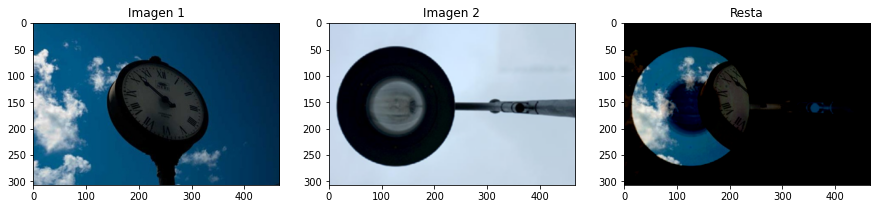

In [22]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Leer las imágenes de entrada y asegurarse que tengan el mismo tamaño
img1 = cv2.cvtColor(cv2.imread('res/m3/example_2.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/m3/example_3.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

#Realizar la operación resta y darle el tipo de dato uint8
res = cv2.subtract(img1,img2).astype(np.uint8)

#Generar una figura 1x3 y mostrar imágenes de entrada y la resta de las mismas
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Resta");
   

## Aplicaciones de la resta

La resta de imágenes tiene uno de sus mayores usos en la segmentación para eliminar (o corregir) el background de una escena. Para estos casos es conveniente añadir una compensación a modo de evitar que nuestros valores se acerquen demasiado a 0 y perdamos información.


Text(0.5, 1.0, 'Resta')

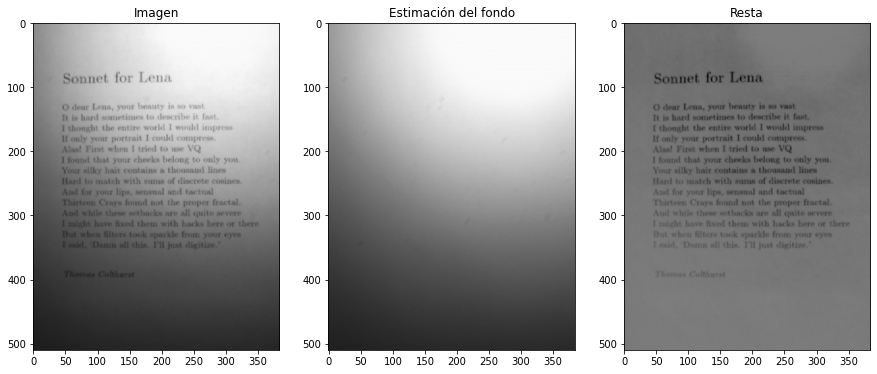

In [23]:

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de imágenes de entrada
img1 = cv2.cvtColor(cv2.imread('res/aritm/son1.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/aritm/son2.jpg'), cv2.COLOR_BGR2RGB)

#Conversión de imágenes al mismo tipo de dato, uint16
img1 = img1.astype(np.uint16)
img2 = img2.astype(np.uint16)

#Sumarle a cada posición de img1 125, como ahora es tipo uint16, no hay pérdida de información
img1 += 125

#Realiza la resta
res = img1 - img2

#Resta las 125 unidades de img1 que inicialmente sumamos
img1 -= 125

#Regresa al tipo de dato uint8, entre 0 y 255
img1 = img1.astype(np.uint8)
img2 = img2.astype(np.uint8)

#La resta debe por tanto, ser también tipo de dato uint8
res=res.astype(np.uint8)

#Genera una figura 1x3 para realizar la muestra de imágenes, fondo y resta.
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Estimación del fondo")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Resta")

Otra aplicación de la resta es en la detección de movimiento entre dos imágenes, útil en la compresión de video y en el seguimiento de objetos.

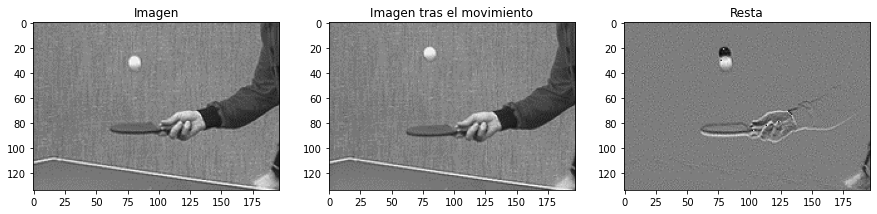

In [24]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de las dos imágenes
img1 = cv2.cvtColor(cv2.imread('res/aritm/raqueta1.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/aritm/raqueta2.png'), cv2.COLOR_BGR2RGB)

#Conversión a tipo de dato uint16
img1 = img1.astype(np.uint16)
img2 = img2.astype(np.uint16)

#Suma 125 unidades a img1, hace la resta de imágenes y los extraemos de nuevo
img1 += 125
res = img1 - img2
img1 -= 125

#Regresa al tipo de dato uint8 entre 0 y 255
img1 = img1.astype(np.uint8)
img2 = img2.astype(np.uint8)
res=res.astype(np.uint8)

#Genera una figura 1x3 para mostrar la imagen, una estimacion de fondo y la resta
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen tras el movimiento")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Resta");

La resta de imágenes también se usa mucho en medicina...

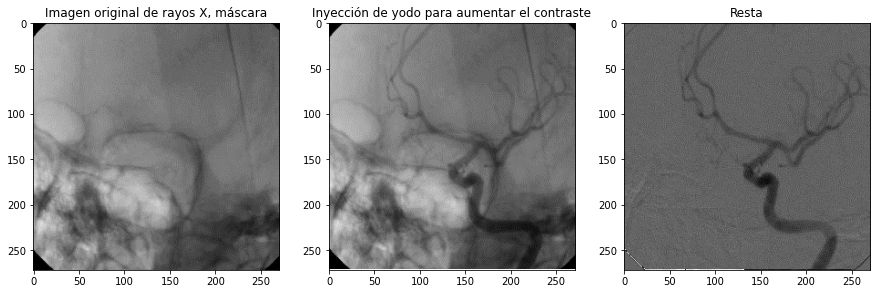

In [25]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de las imágenes entrada
img2 = cv2.cvtColor(cv2.imread('res/aritm/venas1.png'), cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(cv2.imread('res/aritm/venas2.png'), cv2.COLOR_BGR2RGB)

#Conversión a uint16
img1 = img1.astype(np.uint16)
img2 = img2.astype(np.uint16)

#Suma 100 unidades a img1, hace la resta y extrae la misma cantidad de unidades
img1 += 100
res = img1 - img2
img1 -= 100

#Volver a uint8
img1 = img1.astype(np.uint8)
img2 = img2.astype(np.uint8)
res=res.astype(np.uint8)

#Generar figura 1x3 para mostrar la máscara, la inyección de yodo y la resta de imágenes
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img2,cmap='gray')
plt.title("Imagen original de rayos X, máscara")

plt.subplot(1,3,2)
plt.imshow(img1,cmap='gray')
plt.title("Inyección de yodo para aumentar el contraste")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Resta");

La suma y la resta pueden combinarse para llevar a cabo seguimiento de objetos como se ve a continuación:

<img src="res/aritm/movement.png">


## Multiplicación

La multiplicación de imágenes puede ser usada para extraer regiones de interés usando una mascara (aunque esto se hace con operaciones booleanas).


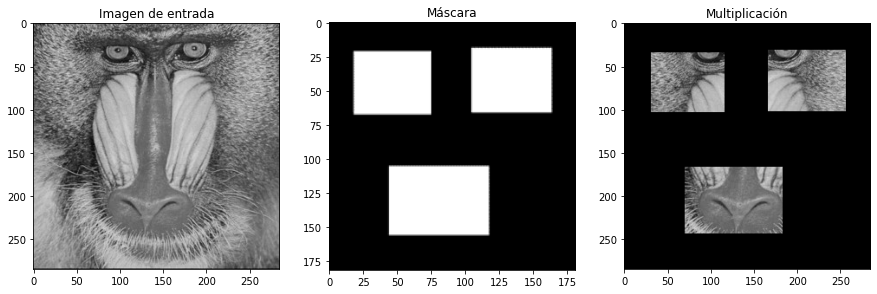

In [26]:
#Leer la imagen
img = cv2.cvtColor(cv2.imread('res/aritm/face.jpg'), cv2.COLOR_BGR2RGB)

#Leer la máscara y normalizarla, cambiar su tipo de dato y ajustar su tamaño
mascara = cv2.imread('res/aritm/mask.png')/255
show_mask = cv2.imread('res/aritm/mask.png')/255
mascara = cv2.resize(mascara, (img.shape[1], img.shape[0])).astype(np.uint8)

#Operación multiplicar
out = cv2.multiply(img, mascara)

#Figura 1x3 para mostrar imagen de entrada, máscara y la multiplicación
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('Máscara')
ax3.set_title('Multiplicación')
ax1.imshow(img, cmap='gray')
ax2.imshow(show_mask, cmap='gray')
ax3.imshow(out, cmap='gray')

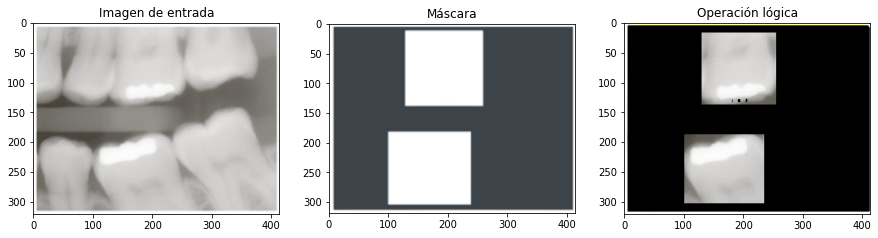

In [27]:
#Lectura de imagen
img = cv2.cvtColor(cv2.imread('res/aritm/dientes.png'), cv2.COLOR_BGR2RGB)

#Leer la máscara, normalizarla
mascara = cv2.imread('res/aritm/mask2.png')/255
show_mask = cv2.imread('res/aritm/mask2.png')
mascara = cv2.resize(mascara, (img.shape[1], img.shape[0]))
mascara = mascara.astype(np.uint8)

#Operación multiplicación
out = cv2.multiply(img, mascara)

#Figura 1x3 que muestra la imagen de entrada, máscara y la multiplicación
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('Máscara')
ax3.set_title('Operación lógica')
ax1.imshow(img, cmap='gray')
ax2.imshow(show_mask, cmap='gray')
ax3.imshow(out, cmap='gray')

## División

La división puede ser utilizada para detectar movimiento de manera similar a la resta. Hay que considerar, sin embargo, que será necesario escalar la imagen para poder visualizarla.

Text(0.5, 1.0, 'División')

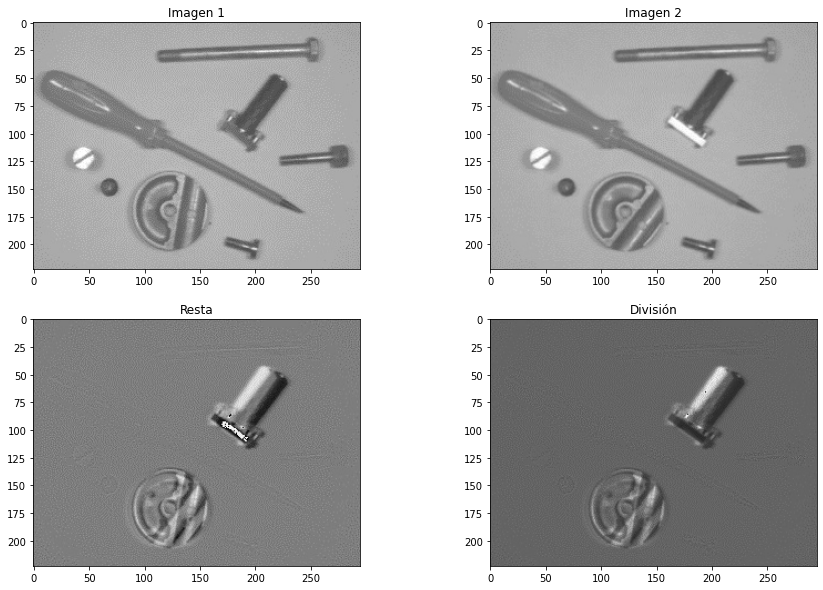

In [28]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de imágenes de entrada, se ponen del mismo tamaño para poder operarlas
img1 = cv2.cvtColor(cv2.imread('res/aritm/herr.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/aritm/herr2.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))


#RESTA
img1 = img1.astype(np.uint16)
img2 = img2.astype(np.uint16)
img1 += 125
res = img1 - img2
res = res.astype(np.uint8)
img1 -= 125
img1 = img1.astype(np.uint8)
img2 = img2.astype(np.uint8)

#DIVISION

#Es importante convertir los datos a flotante si se dispone a dividir
img1_div = img1.astype(np.float32)
img2_div = img2.astype(np.float32)
div = cv2.divide(img1_div,img2_div)
div = div * 100
div = div.astype(np.uint8)

#Crear figura 2x2 para mostrar las imágenes de entrada con sus operaciones respectivas
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(2,2,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2")

plt.subplot(2,2,3)
plt.imshow(res,cmap='gray')
plt.title("Resta")

plt.subplot(2,2,4)
plt.imshow(div,cmap='gray')
plt.title("División")


<hr>

## 2. Transformaciones Logicas
<hr>

Las operaciones lógicas o booleanas en la mayoría de los casos solo tienen sentido cuando una o ambas imágenes son binarias. Cuando se maneja una única imagen binaria, a esta se le suele denominar máscara. La idea consiste entonces en operar dos imágenes utilizando operadores logicos conocidos:
<ul>
    <li>C(x, y):= A(x,y) AND B(x,y)</li>
    <li>C(x, y):= A (x,y) OR B(x,y)</li>
    <li>C(x, y):= A (x,y) XOR B(x,y)</li>
    <li>C(x, y):= NOT  A (x,y) AND B(x,y)</li>
</ul>
<br>
El resultado de una operacion lógica es una imagen compuesta de 0 para los casos en los que la operacion es FALSE, y 1 o 255 cuando la operacion en TRUE.
<br>
<center><i>Figura. Ejemplo de operación lógica o booleana.</i></center>
<img src="res/bool/bool.png" alt="operaciones" style="height:400px"></img>
<br>

# OPERADOR AND

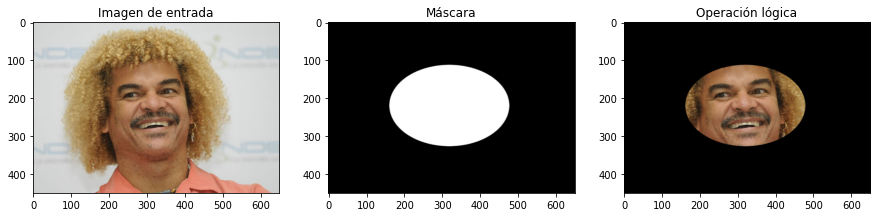

In [29]:
#Se lee la imagen
img = cv2.cvtColor(cv2.imread('res/bool/pibe.jpg'), cv2.COLOR_BGR2RGB)
#Cargar la máscara, normalizarla dividiendo por 255 (ya que trabajamos datos uint8)
mascara = cv2.imread('res/bool/mascara.png')/255
#Ajustar el tamaño de la máscara al de la img
mascara = cv2.resize(mascara, (img.shape[1], img.shape[0]))
#out = img * np.logical_and(img, np.logical_not(mascara))
#Aplicar la operación AND sobre la imagen de entrada y la máscara
out = img * mascara
out = out/255
#Generar un subplot 1x3 para mostrar la imagen de entrada, la máscara y la operación AND
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('Máscara')
ax3.set_title('Operación lógica')
ax1.imshow(img, cmap='gray')
ax2.imshow(mascara, cmap='gray')
ax3.imshow(out, cmap='gray')

Text(0.5, 1.0, 'Imagen AND')

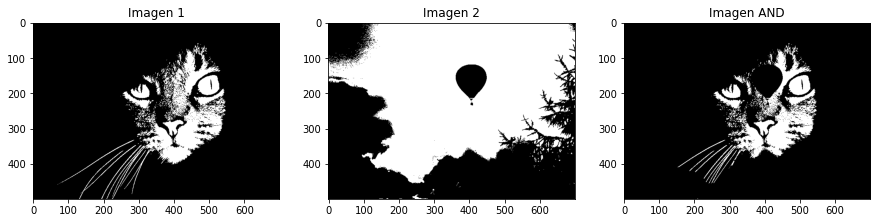

In [30]:
import cv2
import numpy as np
#Otra forma de hacer la operación AND

#Se leen las dos imágenes, la entrada I1 y la máscara I2
I1=cv2.imread("res/bool/gato.jpg",cv2.IMREAD_GRAYSCALE)
I2=cv2.imread("res/bool/globo.jpg",cv2.IMREAD_GRAYSCALE)

#Se realiza una umbralización(conversión de la imagen a dos valores, 0 y 255)
Umbral1,I1BN=cv2.threshold(I1,60,255, cv2.THRESH_BINARY)
Umbral2,I2BN=cv2.threshold(I2,60,255, cv2.THRESH_BINARY)

#R, corresponde a la operación AND aplicada sobre I1BN e I2BN, análogo al out.
R=cv2.bitwise_and(I1BN,I2BN)
#R = I1BN*I2BN

#Generar un subplot 1x3 para mostrar la imagen de entrada, la máscara y la operación AND
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(I1BN,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(I2BN,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(R,cmap='gray')
plt.title("Imagen AND")

# OPERADOR OR

Text(0.5, 1.0, 'Imagen OR')

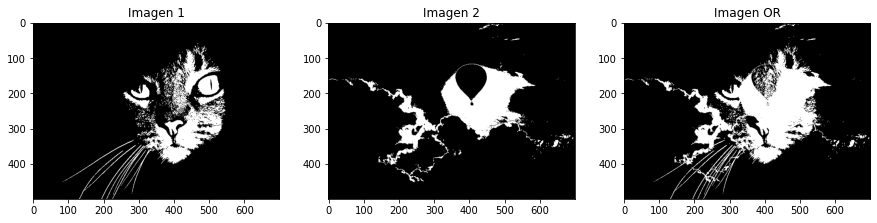

In [31]:
import cv2
import numpy as np
#Se leen las dos imágenes, la entrada I1 y la máscara I2
I1=cv2.imread("res/bool/gato.jpg",cv2.IMREAD_GRAYSCALE)
I2=cv2.imread("res/bool/globo.jpg",cv2.IMREAD_GRAYSCALE)

#Se realiza una umbralización(conversión de la imagen a dos valores, 0 y 255)
Umbral1,I1BN=cv2.threshold(I1,72,255, cv2.THRESH_BINARY)
Umbral2,I2BN=cv2.threshold(I2,148,255, cv2.THRESH_BINARY)

#R, corresponde a la operación OR aplicada sobre I1BN e I2BN.
R=cv2.bitwise_or(I1BN,I2BN)

#Generar un subplot 1x3 para mostrar la imagen de entrada, la máscara y la operación OR
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(I1BN,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(I2BN,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(R,cmap='gray')
plt.title("Imagen OR")


# OPERADOR XOR

Text(0.5, 1.0, 'Imagen XOR')

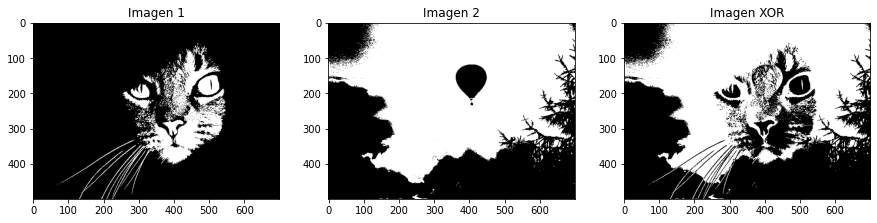

In [32]:
import cv2
import numpy as np

#Se leen las dos imágenes, la entrada I1 y la máscara I2
I1=cv2.imread("res/bool/gato.jpg",cv2.IMREAD_GRAYSCALE)
I2=cv2.imread("res/bool/globo.jpg",cv2.IMREAD_GRAYSCALE)

#Se realiza una umbralización(conversión de la imagen a dos valores, 0 y 255)
Umbral1,I1BN=cv2.threshold(I1,60,255, cv2.THRESH_BINARY)
Umbral2,I2BN=cv2.threshold(I2,60,255, cv2.THRESH_BINARY)

#R, corresponde a la operación XOR aplicada sobre I1BN e I2BN.
R=cv2.bitwise_xor(I1BN,I2BN)

#Generar un subplot 1x3 para mostrar la imagen de entrada, la máscara y la operación XOR
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(I1BN,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(I2BN,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(R,cmap='gray')
plt.title("Imagen XOR")

# OPERADOR NOT

Text(0.5, 1.0, 'Imagen Negada')

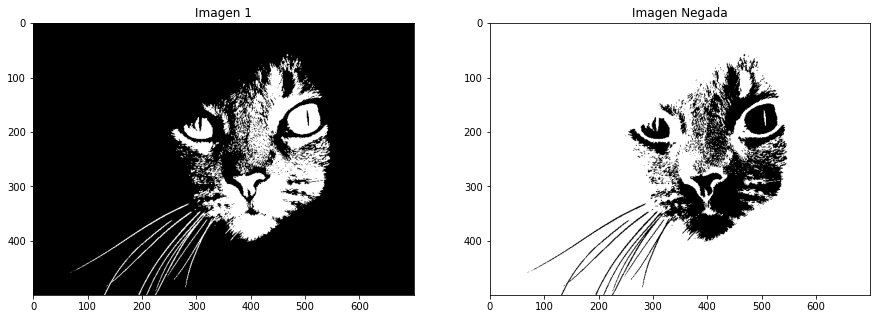

In [33]:
import cv2
import numpy as np

#Se lee la imagen de entrada 
I1=cv2.imread("res/bool/gato.jpg",cv2.IMREAD_GRAYSCALE)

#Se realiza una umbralización(conversión de la imagen a dos valores, 0 y 255)
Umbral1,I1BN=cv2.threshold(I1,60,255, cv2.THRESH_BINARY)

#R, corresponde a la operación NOT aplicada sobre I1BN e I2BN.
R=cv2.bitwise_not(I1BN)

#Generar un subplot 1x2 para mostrar la imagen de entrada y la operación NOT
fig = plt.figure(figsize=(15,24))

plt.subplot(1,2,1)
plt.imshow(I1BN,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,2,2)
plt.imshow(R,cmap='gray')
plt.title("Imagen Negada")

<hr>

### Analicemos
<br>
<center><i>Figura. Dadas las dos primeras imágenes, ¿qué operador booleano debe usarse para generar la tercera imagen? Las imágenes se arroz1.png y arroz2.png se encuentran en la carpeta res/bool. </i></center>
<img src="res/bool/bool_2.png" alt="operaciones" style="height:200px"></img>
<br>

<!-- ![image.png](attachment:image.png) --> 